In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./agaricus-lepiota.data')

df = df.drop(['veil-type', ], axis=1)

# First we must convert the data into ordinal data
label_encoder = LabelEncoder()

df.astype('category')
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.drop(['edibility'], axis=1), df['edibility']

print(X.shape)

skb = SelectKBest(chi2, k=3)
skb.fit(X, y)
X_new = skb.transform(X)

print(X_new.shape)

# Fetch the selected feature indices and print the corresponding feature names
np.array(df.columns)[skb.get_support(indices=True)]

(8124, 21)
(8124, 3)


array(['gill-spacing', 'gill-size', 'ring-number'], dtype=object)

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

# normalize data
# df = df.drop(['edibility'], axis=1)
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=3)
x = pca.fit_transform(data_scaled)

# Dump components relations with features:
result = pd.DataFrame(pca.components_,columns=data_scaled.columns)
print(result)

   edibility  cap-shape  cap-surface  cap-color  bruises?      odor  \
0   0.317825   0.015844     0.103591  -0.150341 -0.326912  0.186439   
1   0.309345   0.052712    -0.061032   0.179749 -0.228239 -0.329648   
2  -0.126519   0.007585    -0.187862   0.217567 -0.202168 -0.067362   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0         0.064336     -0.012395   0.369335   -0.380190  ...   
1        -0.001273     -0.139185  -0.126001   -0.083645  ...   
2         0.158519      0.520271  -0.107965   -0.016759  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                 -0.145857                 -0.162187                0.061807   
1                 -0.308022                 -0.278245               -0.364727   
2                 -0.269062                 -0.252444                0.180427   

   stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                0.057675    0.061742    -0.015226  -0.402314   
1  

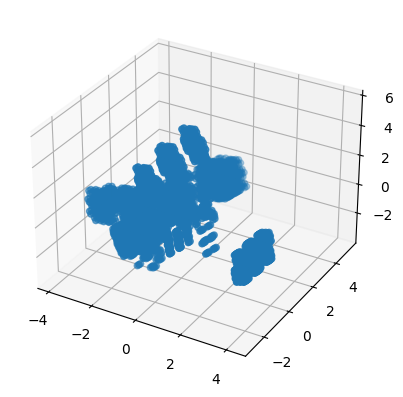

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2])

In [35]:
print(result.abs().sum(axis=0).sort_values())
print()

cap-shape                   0.076141
habitat                     0.164855
veil-color                  0.221379
gill-attachment             0.224128
ring-number                 0.292977
cap-surface                 0.352485
stalk-shape                 0.465682
gill-color                  0.480594
cap-color                   0.547657
odor                        0.583449
stalk-color-below-ring      0.593211
stalk-root                  0.593940
population                  0.595215
gill-size                   0.603301
stalk-color-above-ring      0.606961
ring-type                   0.650298
gill-spacing                0.671851
stalk-surface-below-ring    0.692875
spore-print-color           0.708709
stalk-surface-above-ring    0.722941
edibility                   0.753689
bruises?                    0.757319
dtype: float64

